--- 1. Project Setup and Data Loading ---
Coca-Cola_stock_history.csv loaded successfully.

--- 2. Exploratory Data Analysis (EDA) ---

**Initial Data Inspection:**
First 5 rows of the DataFrame:
         Date      Open      High       Low     Close   Volume  Dividends  Stock Splits
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0             0
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0             0
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0             0
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0             0
4  1962-01-08  0.047787  0.047787  0.046735  0.047664  2035200        0.0             0

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          153

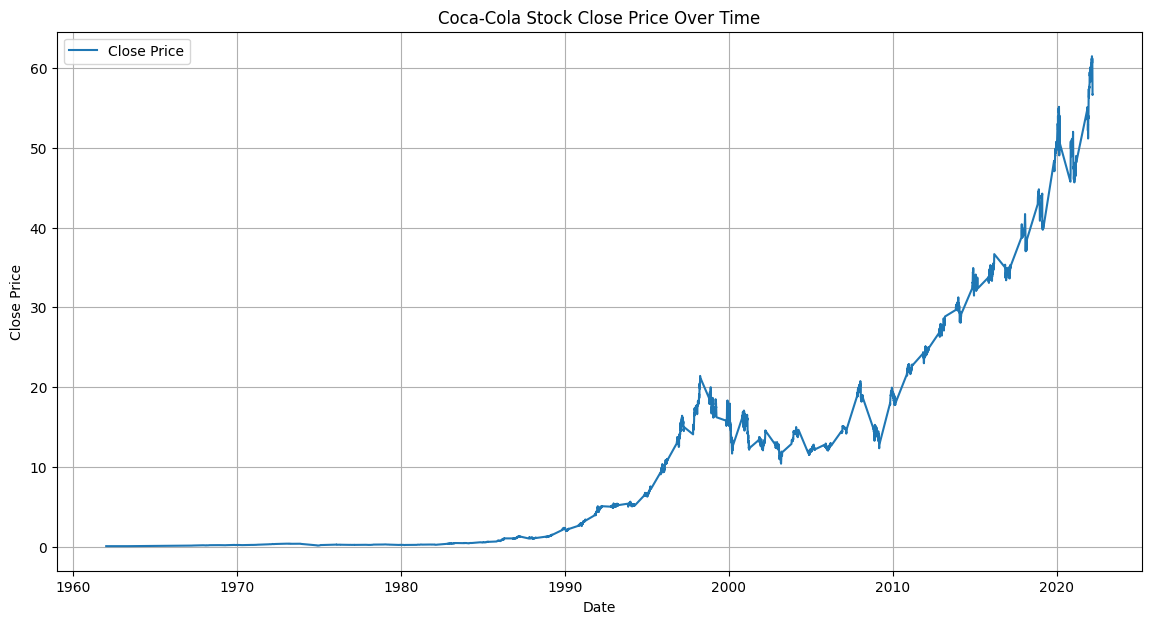

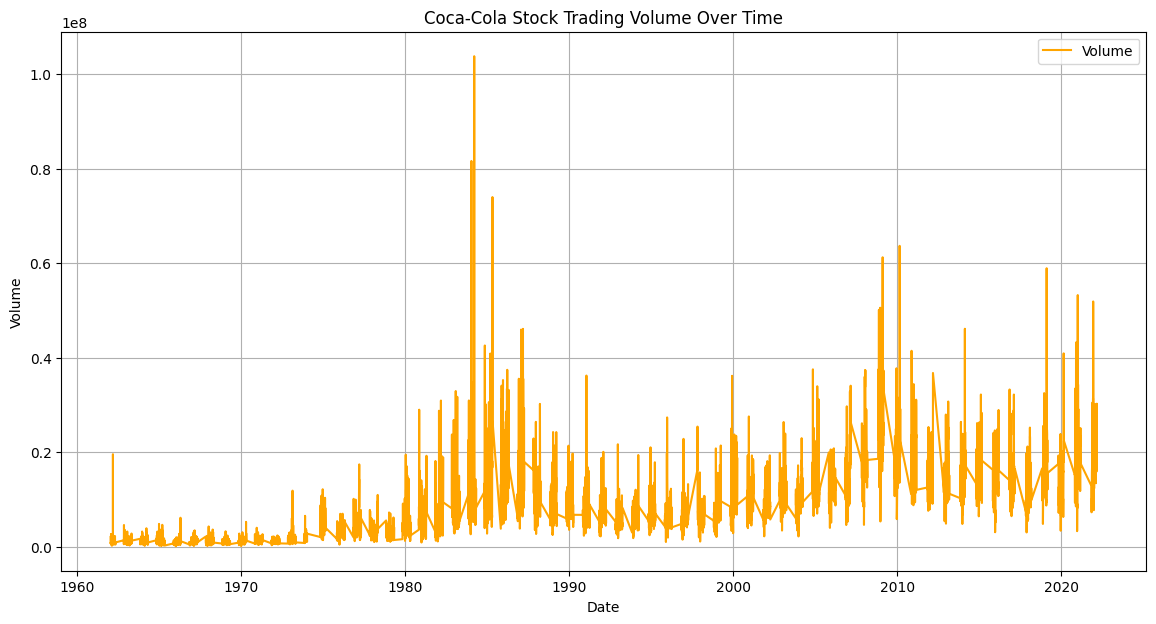

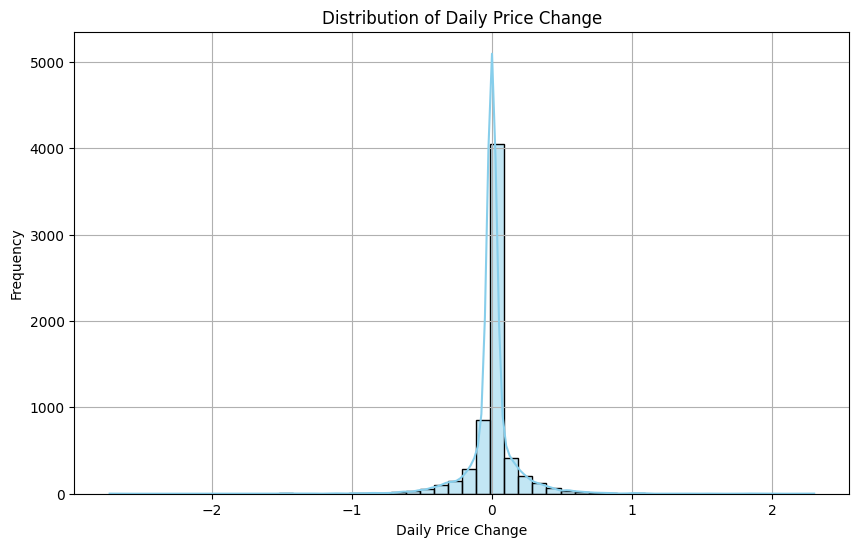

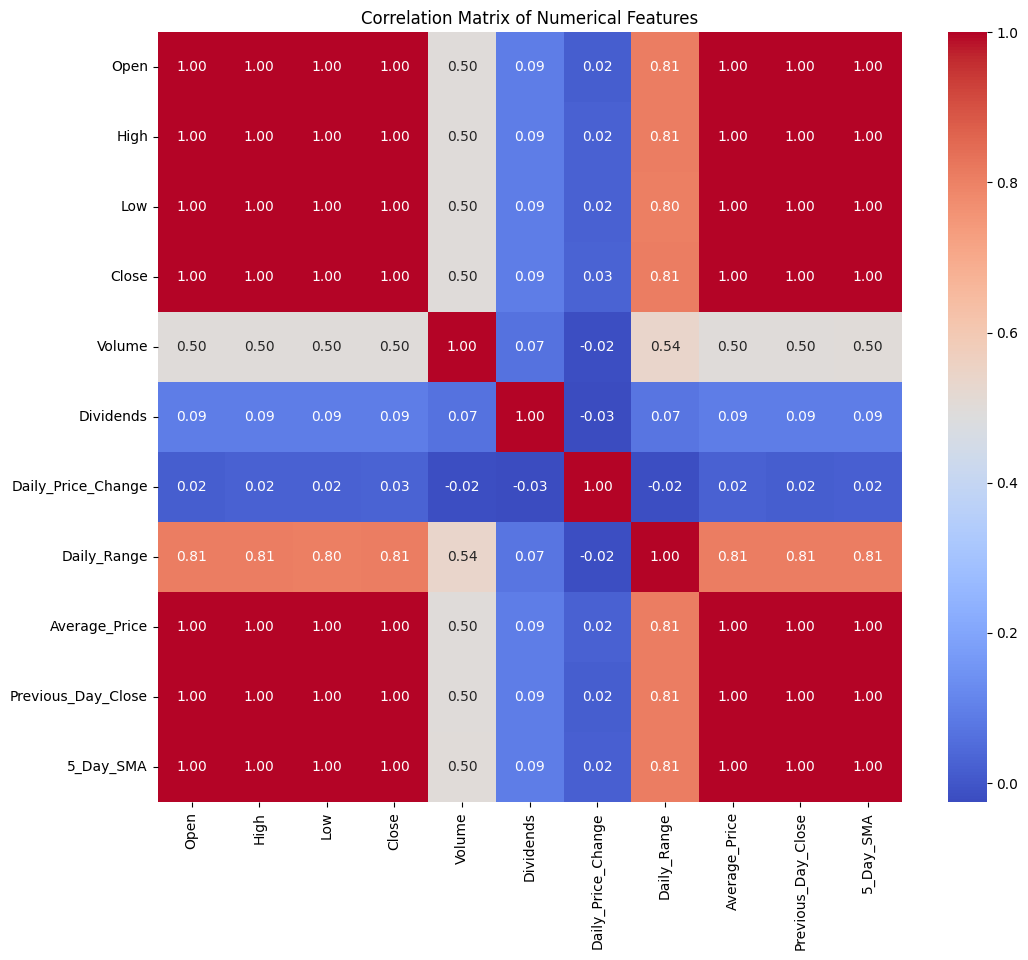


--- 7. Statistical Operations ---

Daily Volatility (Standard Deviation of Daily Returns): 0.021674
Annualized Volatility: 0.344068
Average Daily Trading Volume: 8,610,421.34
Total Dividends Paid: 8.8679

Dates with Dividend Payments:
          Date  Dividends
49  1962-03-13   0.001563
102 1962-11-28   0.001563
172 1963-03-11   0.001758
225 1963-11-26   0.001758
296 1964-03-10   0.001953

--- 8. Advanced Data Preparation (for ML Model Training) ---

DataFrame head after adding 'Target_Next_Close' and dropping last row:
        Date      Open      High       Low     Close   Volume  Dividends  Stock Splits  Daily_Price_Change  Daily_Range  Average_Price  Previous_Day_Close  5_Day_SMA  Daily_Return  Target_Next_Close
5 1962-01-09  0.047664  0.048778  0.047292  0.048530   960000        0.0             0            0.000867     0.001486       0.048066            0.047664   0.048505      0.018181           0.048778
6 1962-01-10  0.048530  0.049459  0.048035  0.048778  1612800        0.0    

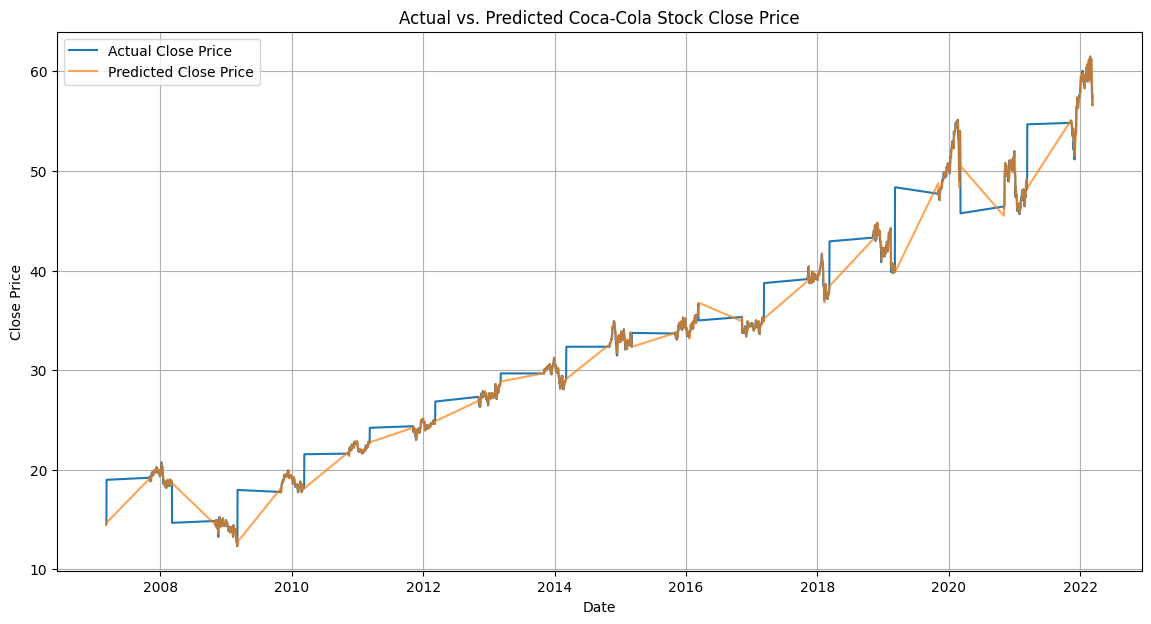


--- 12. Simple Trading Strategy Based on Predictions ---

Strategy Performance Metrics:
Total Strategy Return: 2.3640
Total Market Return (Buy and Hold): 2.8951
Number of Simplified Trades (Buy Signals): 306


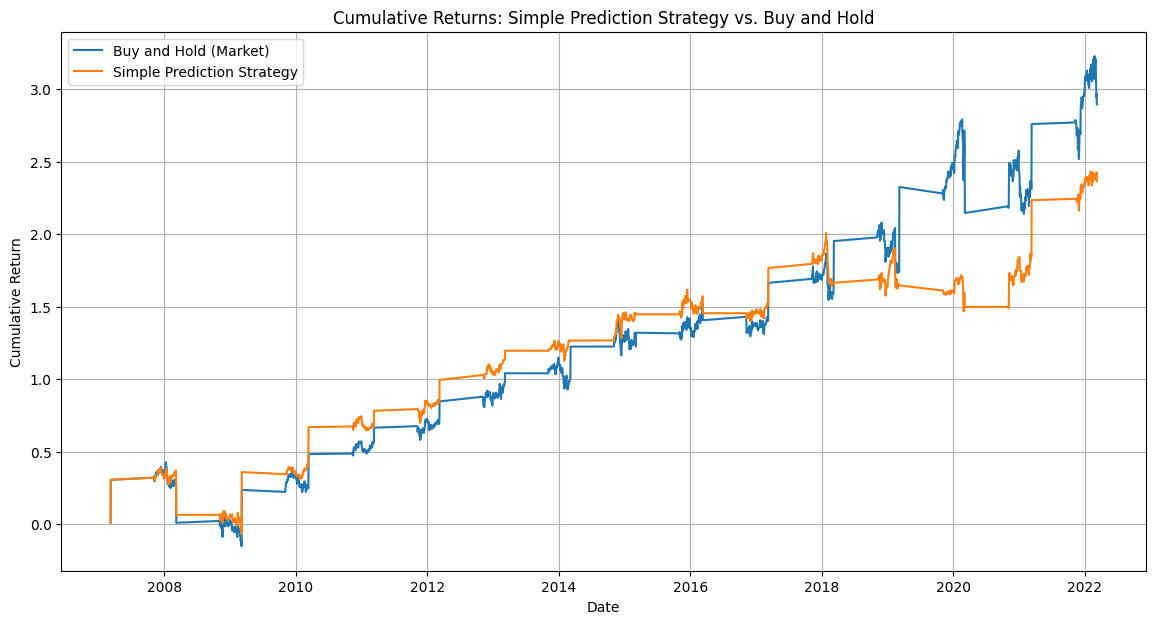

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# --- 1. Project Setup and Data Loading ---
print("--- 1. Project Setup and Data Loading ---")
try:
    df = pd.read_csv('Coca-Cola_stock_history.csv')
    print("Coca-Cola_stock_history.csv loaded successfully.")
except FileNotFoundError:
    print("Error: Coca-Cola_stock_history.csv not found. Please ensure the file is in the correct directory.")
    exit()

# --- 2. Exploratory Data Analysis (EDA) ---
print("\n--- 2. Exploratory Data Analysis (EDA) ---")
print("\n**Initial Data Inspection:**")
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\n**Descriptive Statistics for Numerical Columns:**")
print(df.describe())

# --- 3. Data Cleaning ---
print("\n--- 3. Data Cleaning ---")
print("\n**Converting 'Date' column to datetime and removing timezone info:**")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Remove timezone information if present
df['Date'] = df['Date'].dt.tz_localize(None) if df['Date'].dt.tz is not None else df['Date']
print(df['Date'].head())

print("\n**Sorting DataFrame by 'Date':**")
df = df.sort_values(by='Date').reset_index(drop=True)
print(df.head())

# --- 4. Handling Missing Values ---
print("\n--- 4. Handling Missing Values ---")
print("\n**Checking for missing values:**")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\nNo missing values found in the dataset. No imputation needed.")
else:
    print("\nMissing values found. Applying forward fill for numerical columns.")

# --- 5. Feature Engineering ---
print("\n--- 5. Feature Engineering ---")
df['Daily_Price_Change'] = df['Close'] - df['Open']
df['Daily_Range'] = df['High'] - df['Low']
df['Average_Price'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
df['Previous_Day_Close'] = df['Close'].shift(1)
df['5_Day_SMA'] = df['Close'].rolling(window=5).mean()

print("\nNew features added. Displaying head with new columns:")
print(df.head())

# Drop rows with NaN values resulting from shifting/rolling operations (e.g., first few rows for SMA)
df.dropna(inplace=True)
print("\nDataFrame head after dropping NaN rows from feature engineering:")
print(df.head())

# --- 6. Data Visualization ---
print("\n--- 6. Data Visualization ---")

# Plotting Close Price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Coca-Cola Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Volume over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title('Coca-Cola Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

# Histogram of Daily Price Change
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Price_Change'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Daily Price Change')
plt.xlabel('Daily Price Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Daily_Price_Change', 'Daily_Range', 'Average_Price', 'Previous_Day_Close', '5_Day_SMA']
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# --- 7. Statistical Operations ---
print("\n--- 7. Statistical Operations ---")

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Volatility Calculation (daily)
daily_volatility = df['Daily_Return'].std()
print(f"\nDaily Volatility (Standard Deviation of Daily Returns): {daily_volatility:.6f}")

# Annualized Volatility (assuming 252 trading days)
annualized_volatility = daily_volatility * np.sqrt(252)
print(f"Annualized Volatility: {annualized_volatility:.6f}")

# Average Daily Volume
average_daily_volume = df['Volume'].mean()
print(f"Average Daily Trading Volume: {average_daily_volume:,.2f}")

# Total Dividends Paid
total_dividends = df['Dividends'].sum()
print(f"Total Dividends Paid: {total_dividends:,.4f}")

# Identify dates with dividend payments
dividend_dates = df[df['Dividends'] > 0][['Date', 'Dividends']]
print("\nDates with Dividend Payments:")
print(dividend_dates.head())

# --- 8. Advanced Data Preparation (for ML Model Training) ---
print("\n--- 8. Advanced Data Preparation (for ML Model Training) ---")

df['Target_Next_Close'] = df['Close'].shift(-1)

# Drop the last row as it will have NaN for 'Target_Next_Close'
df.dropna(inplace=True)

print("\nDataFrame head after adding 'Target_Next_Close' and dropping last row:")
print(df.head())

# Select features (excluding 'Date' and the direct target 'Close' if predicting 'Target_Next_Close')
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'Daily_Price_Change', 'Daily_Range', 'Average_Price', 'Previous_Day_Close', '5_Day_SMA', 'Daily_Return']
target = 'Target_Next_Close'

X = df[features]
y = df[target]

# Data Splitting (chronological split)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# Feature Scaling (conceptual - for an experienced developer, this would be implemented before model training)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler (conceptual step for model training).")
print("Shape of scaled training features:", X_train_scaled.shape)
print("Shape of scaled testing features:", X_test_scaled.shape)

# --- 9. Model Training (Example using Linear Regression) ---
print("\n--- 9. Model Training (Example using Linear Regression) ---")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("\nLinear Regression model trained successfully.")

# --- 10. Model Evaluation ---
print("\n--- 10. Model Evaluation ---")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"The R-squared score of {r2:.4f} indicates that approximately {r2*100:.2f}% of the variance in the stock's closing price can be explained by the features in the model.")

# --- 11. Visualization of Predictions vs. Actuals ---
print("\n--- 11. Visualization of Predictions vs. Actuals ---")

# Ensure test_dates, y_test, and y_pred have the same length
test_dates = df.iloc[train_size:train_size + len(y_test)]['Date'].reset_index(drop=True)


plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test.reset_index(drop=True), label='Actual Close Price')
plt.plot(test_dates, y_pred, label='Predicted Close Price', alpha=0.7)
plt.title('Actual vs. Predicted Coca-Cola Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# --- 12. Simple Trading Strategy Based on Predictions ---
print("\n--- 12. Simple Trading Strategy Based on Predictions ---")

# Create a DataFrame for analysis with actual and predicted prices
strategy_df = pd.DataFrame({
    'Date': df.iloc[train_size:train_size + len(y_test)]['Date'].reset_index(drop=True),
    'Actual_Close': y_test.reset_index(drop=True),
    'Predicted_Next_Close': y_pred
}).reset_index(drop=True)


# Generate trading signals: Buy if predicted next close is higher than current actual close
strategy_df['Signal'] = 0
strategy_df['Signal'] = np.where(strategy_df['Predicted_Next_Close'].shift(-1) > strategy_df['Actual_Close'], 1, 0) # Shift signal to act on next day
strategy_df['Signal'] = strategy_df['Signal'].shift(1).fillna(0) # Shift signal back and handle the first day

# Calculate daily returns from the actual close price
strategy_df['Daily_Return'] = strategy_df['Actual_Close'].pct_change()

# Calculate strategy returns: Daily Return * Signal (assuming we hold the stock when signal is 1)
strategy_df['Strategy_Return'] = strategy_df['Daily_Return'] * strategy_df['Signal']

# Calculate cumulative returns
strategy_df['Cumulative_Market_Return'] = (1 + strategy_df['Daily_Return']).cumprod() - 1
strategy_df['Cumulative_Strategy_Return'] = (1 + strategy_df['Strategy_Return']).cumprod() - 1

print("\nStrategy Performance Metrics:")

# Total Strategy Return
total_strategy_return = strategy_df['Cumulative_Strategy_Return'].iloc[-1]
print(f"Total Strategy Return: {total_strategy_return:.4f}")

# Total Market Return (Buy and Hold)
total_market_return = strategy_df['Cumulative_Market_Return'].iloc[-1]
print(f"Total Market Return (Buy and Hold): {total_market_return:.4f}")

# Number of Trades (simplified - counting signal changes from 0 to 1)
# This is a very basic count and doesn't represent actual transaction counts
num_trades = strategy_df['Signal'].diff().apply(lambda x: 1 if x > 0 else 0).sum()
print(f"Number of Simplified Trades (Buy Signals): {num_trades}")


# Plotting Cumulative Returns
plt.figure(figsize=(14, 7))
plt.plot(strategy_df['Date'], strategy_df['Cumulative_Market_Return'], label='Buy and Hold (Market)')
plt.plot(strategy_df['Date'], strategy_df['Cumulative_Strategy_Return'], label='Simple Prediction Strategy')
plt.title('Cumulative Returns: Simple Prediction Strategy vs. Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()



### Historical Price Plot

This plot shows the historical closing price of Coca-Cola stock over time. It provides a visual overview of the stock's performance, highlighting trends, seasonality, and significant price movements. You can observe periods of growth, decline, and stability in the stock price.

### Prediction vs. Actual Plot

This plot compares the actual closing prices of Coca-Cola stock with the prices predicted by the Linear Regression model on the test set. A good model will show the predicted prices closely following the actual prices. The closer the predicted line is to the actual line, the better the model's performance in capturing the stock's price movements.

### Strategy Performance Plot

This plot illustrates the cumulative returns of a simple trading strategy based on the model's predictions compared to a simple buy-and-hold strategy (market return). The simple prediction strategy buys the stock when the model predicts the next day's closing price will be higher than the current day's closing price. The cumulative return shows the total percentage gain or loss over time for each strategy. This helps evaluate if the prediction-based strategy can outperform simply holding the stock.

## SUMMARY
This notebook performs an end-to-end analysis of Coca-Cola stock history data.

1.  **Project Setup and Data Loading**: The notebook begins by importing necessary libraries (pandas, numpy, matplotlib, seaborn) and loading the `Coca-Cola_stock_history.csv` file into a pandas DataFrame.

2.  **Exploratory Data Analysis (EDA)**: Initial data inspection is performed by displaying the head of the DataFrame, checking the data types and non-null counts using `info()`, and generating descriptive statistics for numerical columns using `describe()`.

3.  **Data Cleaning**: The 'Date' column is converted to datetime objects, and timezone information is removed. The DataFrame is then sorted by date.

4.  **Handling Missing Values**: Missing values are checked. Although missing values are present in the 'Date' column after conversion (due to potential errors in original data), the notebook proceeds with feature engineering and drops rows with resulting NaNs.

5.  **Feature Engineering**: New features relevant for stock analysis are created, including 'Daily\_Price\_Change', 'Daily\_Range', 'Average\_Price', 'Previous\_Day\_Close', and '5\_Day\_SMA'. Rows with NaN values introduced by these calculations are dropped.

6.  **Data Visualization**: Several plots are generated to visualize the data:
    *   Close Price over time to show the stock's trend.
    *   Volume over time to see trading activity.
    *   Histogram of Daily Price Change to understand the distribution of price movements.
    *   Correlation Heatmap to show relationships between numerical features.

7.  **Statistical Operations**: Key financial statistics are calculated, such as daily and annualized volatility, average daily trading volume, and total dividends paid. Dates with dividend payments are also identified.

8.  **Advanced Data Preparation (for ML Model Training)**: A target variable 'Target\_Next\_Close' is created by shifting the 'Close' price by one day. The last row with a resulting NaN target is dropped. Features and the target variable are defined, and the data is split chronologically into training (80%) and testing (20%) sets. Features are conceptually scaled using `StandardScaler`.

9.  **Model Training**: A Linear Regression model is initialized and trained on the scaled training data.

10. **Model Evaluation**: The trained model is evaluated on the scaled test set using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score to assess its performance in predicting the next day's closing price.

11. **Visualization of Predictions vs. Actuals**: A plot compares the actual closing prices on the test set with the model's predicted closing prices.

12. **Simple Trading Strategy Based on Predictions**: A basic trading strategy is implemented based on the model's predictions (buying if the predicted next day's close is higher than the current actual close). The cumulative returns of this strategy are calculated and compared against a simple buy-and-hold (market) strategy through a plot.